## 1. Introduction

With growing demands in the market, a Superstore Giant likes to have a better understanding of what factors matter to the sales and improve the forthcoming sales strategy. 

The project is using data ['Superstore.csv'](Https://www.kaggle.com/datasets/vivek468/superstore-dataset-final) from Kaggle containing information related to sales, profits, and other facts about a giant Superstore between Jan. 2014 and Jan. 2018.
***

### Objective

In this project, we challenge ourselves: can we forecast the sales in the state of Texas using the Superstore’s sales data across all states? 

The aim is to build a data driven predictive model by using historical data of products segments, categories, shipping modes, and profits. More importantly, we want to explore which information is more useful to predict the sales. 

 - To explore, organize and analyze the data,  and make sure it's well defined
 - To identify features that significantly affect the sales
 - To develop different machine learning models that predict the sales
 - To assess the model performance and select the best model
 ***
 
### Data
a. Orders
 - Row ID => Unique ID for each row.
 - Order ID => Unique Order ID for each Customer.
 - Order Date => Order Date of the product.
 - Ship Date => Shipping Date of the Product.
 - Ship Mode=> Shipping Mode specified by the Customer.
 - Customer ID => Unique ID to identify each Customer.
 - Customer Name => Name of the Customer.
 - Segment => The segment where the Customer belongs.
 - Country => Country of residence of the Customer.
 - City => City of residence of of the Customer.
 - State => State of residence of the Customer.
 - Postal Code => Postal Code of every Customer.
 - Region => Region where the Customer belong.

b. Products
 - Product ID => Unique ID of the Product.
 - Category => Category of the product ordered.
 - Sub-Category => Sub-Category of the product ordered.
 - Product Name => Name of the Product
 - Sales => Sales of the Product.
 - Quantity => Quantity of the Product.
 - Discount => Discount provided.
 - Profit => Profit/Loss incurred.

## 2. Sourcing and Loading the Data

### 2.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import datetime as dt

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update(plt.rcParamsDefault)
sns.set()

### 2.2 Load the data

In [2]:
# read data
df = pd.read_csv('Data/Superstore.csv', encoding='ISO-8859-1')
# check the first few rows of data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
print("The dataset contains: {} customers and {} features.".format(df.shape[0], df.shape[1]))

The dataset contains: 9994 customers and 21 features.


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## 3. Data Cleaning 

In [6]:
# Check null/missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

 - Data is very clean and no missing value is observed.

In [7]:
# Ship mode
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [8]:
# Segment
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [9]:
# df['City'].value_counts()
df['City'].nunique()

531

In [10]:
# Region
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [11]:
# Category
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [12]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [13]:
# remove undesired rows/columns
To_Drop = ['Row ID', 'Order ID','Customer ID', 'Customer Name', 'Product ID', 'Product Name', 'Sub-Category','Country', 'City', 'Postal Code']
df.drop(columns=To_Drop, axis=1, inplace=True)

 - 'Row ID', 'Order ID', 'Customer ID', 'Customer Name', and 'Product ID' were dropped because I think they don't provide much predictive power.
 - 'Product Name' and 'Sub-Category' were dropped as 'Category' has the same information in more general way.
 - 'Country' was dropped, as all the instances occur in the United States.
 - 'City' was dropped, as there are too many individual cities to be accounted for, and it is similar to the information in 'State' and 'Region'.
 - 'Postal Code' was dropped.

## 4. Feature Engineering

 - **'Order Date' and 'Ship Date' are converted to 'datetime' objects instead of objects.**

In [14]:
# reformat and convert 'object' to 'datetime' 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [15]:
# generate a new column about the time between order and shipping to gain more information on the date
df['Waiting_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [16]:
df['Order_Year'] = df['Order Date'].dt.year

In [17]:
# drop columns
df_clean = df.drop(columns=['Order Date', 'Ship Date'], axis=1)

In [18]:
# sort
df_clean = df_clean.sort_values(by=['Sales', 'Profit'], ascending=[False, False])

In [19]:
df_clean.head()

,Ship Mode,Segment,State,Region,Category,Sales,Quantity,Discount,Profit,Waiting_Days,Order_Year
2697,Standard Class,Home Office,Florida,South,Technology,22638.480,6,0.5,-1811.0784,5,2014
6826,Standard Class,Corporate,Indiana,Central,Technology,17499.950,5,0.0,8399.9760,7,2016
8153,First Class,Consumer,Washington,West,Technology,13999.960,4,0.0,6719.9808,2,2017
2623,First Class,Home Office,New York,East,Technology,11199.968,4,0.2,3919.9888,2,2017
4190,Standard Class,Consumer,Delaware,East,Technology,10499.970,3,0.0,5039.9856,5,2017


In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 2697 to 4101
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   State         9994 non-null   object 
 3   Region        9994 non-null   object 
 4   Category      9994 non-null   object 
 5   Sales         9994 non-null   float64
 6   Quantity      9994 non-null   int64  
 7   Discount      9994 non-null   float64
 8   Profit        9994 non-null   float64
 9   Waiting_Days  9994 non-null   int64  
 10  Order_Year    9994 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 936.9+ KB


## 5. EDA

### 5.1  Univariate analysis
Explore each variable, study characteristics of each variable, and there is no reference to causes or relationships.

Univariate non-graphical: Central tendency, Deviation, Skewness, kurtosis, etc.

Univariate graphical: Histogram, Box Plots, Pie Charts, Density Plot, etc.

#### Number of distinct regions and states

In [21]:
#Select the 'Region' and 'state' columns from data and use the `nunique` method to calculate
#the number of unique values in each
df[['Region', 'State']].nunique()

Region     4
State     49
dtype: int64

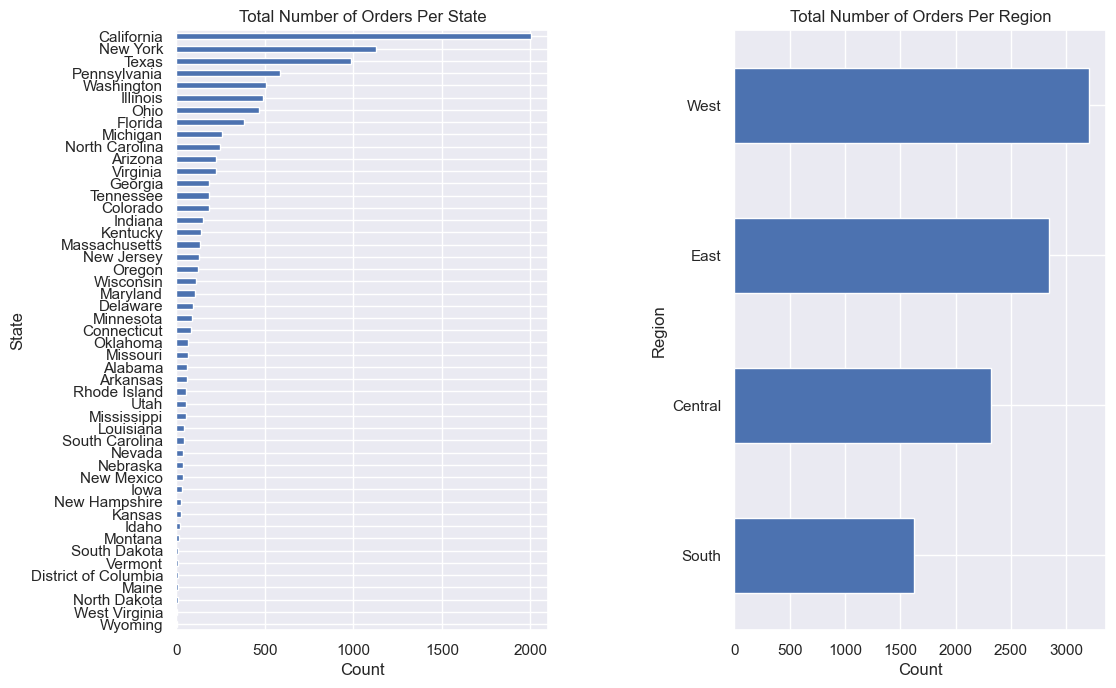

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12,12))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.State.value_counts().sort_values(ascending=True).plot(kind='barh', ax=ax[0])
ax[0].set_ylabel('State')
ax[0].set_xlabel('Count')
ax[0].set_title('Total Number of Orders Per State')

df.Region.value_counts().sort_values(ascending=True).plot(kind='barh', ax=ax[1])
ax[1].set_ylabel('Region')
ax[1].set_xlabel('Count')
ax[1].set_title('Total Number of Orders Per Region')

#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(bottom=0.3, top=0.8, wspace=0.5, hspace=0)
plt.show();

- Looking at the distribution of States, we can see that California (West), New York (East) and Texas (Central) accounting for the majority of orders. The target in this project is Texas which comes in at the 3rd place.

#### Distribution of average numeric variables per state

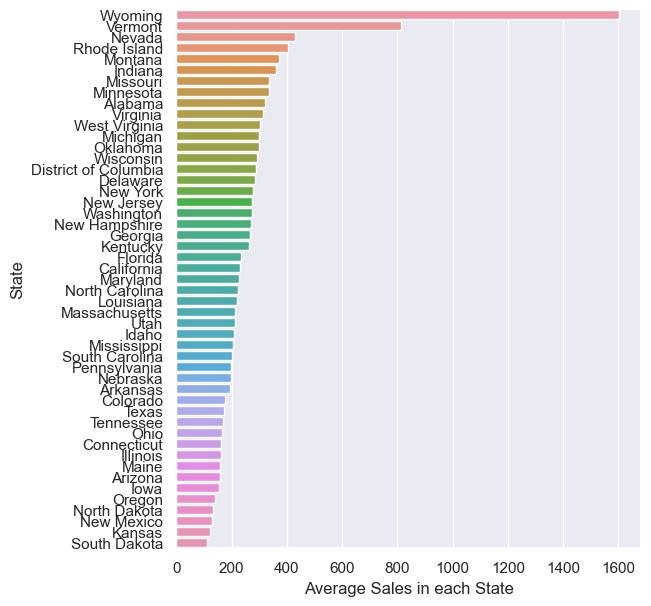

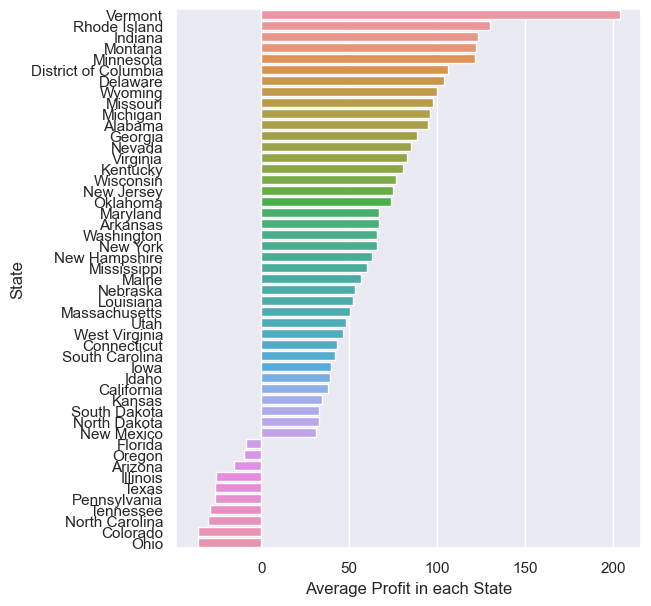

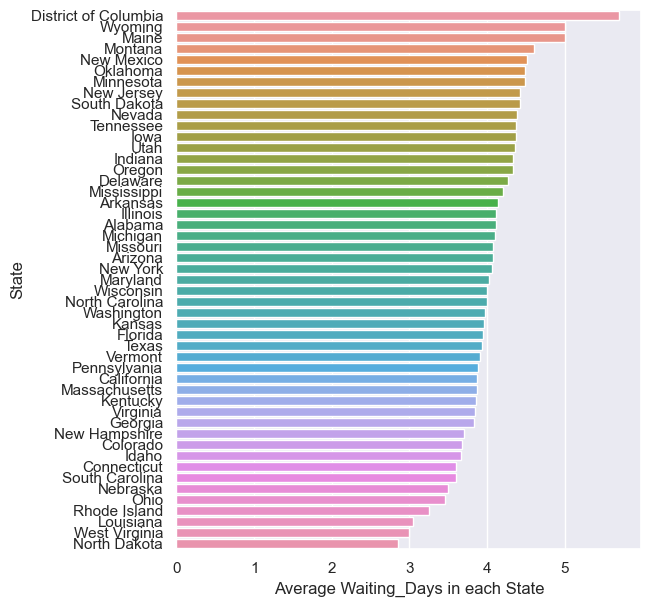

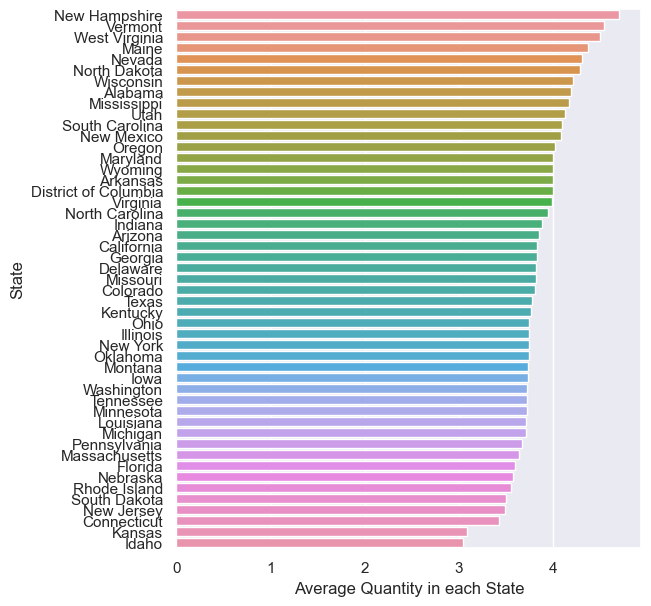

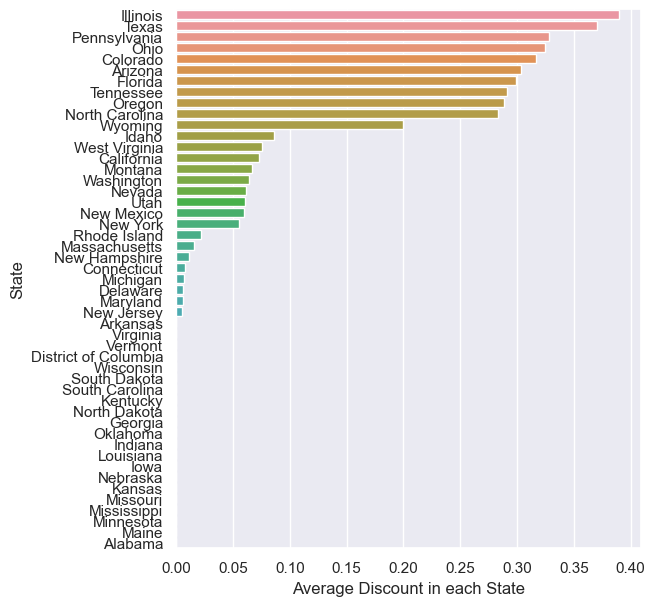

In [23]:
# create a list of columns to be analyszed numerically for all cities
numerical_cols = ['Sales','Profit','Waiting_Days', 'Quantity', 'Discount']

for col in numerical_cols:
    fig, ax = plt.subplots(figsize=(6,7))
    mean_df = df.groupby(by=['State'])[col].mean()
    mean_df.sort_values(inplace=True,ascending=False)
    sns.barplot(y=mean_df.index, x=mean_df, ax=ax)
    ax.set_xlabel(f'Average {col} in each State') 
    ax.set_ylabel('State')
    plt.show();

In [24]:
# aggregations to have a top-level view
State_sales_mean = df_clean.set_index('Order_Year').groupby('State').mean()
State_sales_mean.sort_values('Sales', ascending=False, inplace=True)

State_sales_mean.head()

,Sales,Quantity,Discount,Profit,Waiting_Days
State,,,,,
Wyoming,1603.136000,4.000000,0.200000,100.196000,5.000000
Vermont,811.760909,4.545455,0.000000,204.088936,3.909091
Nevada,428.951333,4.307692,0.061538,85.045279,4.384615
Rhode Island,404.070643,3.553571,0.021429,130.100523,3.250000
Montana,372.623467,3.733333,0.066667,122.221900,4.600000


#### Distribution of Sales

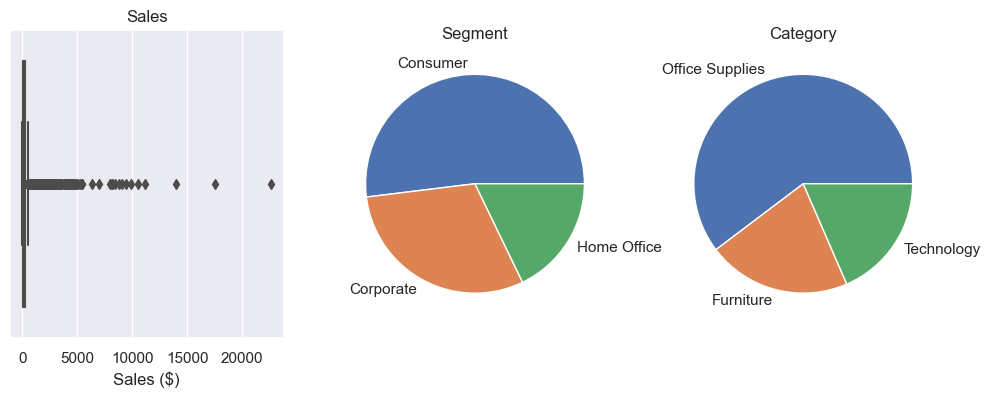

In [25]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x=df_clean['Sales'])
plt.xlabel('Sales ($)')
plt.title('Sales')
plt.subplot(1,3,2)
df_clean['Segment'].value_counts(normalize=True).plot(kind="pie")
plt.title('Segment')
plt.ylabel("")
plt.subplot(1,3,3)
df_clean['Category'].value_counts(normalize=True).plot(kind="pie")
plt.title('Category')
plt.ylabel("")
plt.show();

In [26]:
# remove outliers
q1 = df_clean['Sales'].quantile(0.25)
q3 = df_clean['Sales'].quantile(0.75)
IQR = q3 - q1

filter = (df_clean['Sales'] >= q1 -1.5 *IQR) & (df_clean['Sales'] <= q3 + 1.5 *IQR)
df_cut = df_clean.loc[filter]
df_cut.shape

(8827, 11)

In [27]:
# remove outliers
q1 = df_cut['Profit'].quantile(0.25)
q3 = df_cut['Profit'].quantile(0.75)
IQR = q3 - q1

filter = (df_cut['Profit'] >= q1 -1.5 *IQR) & (df_cut['Profit'] <= q3 + 1.5 *IQR)
df_cut = df_cut.loc[filter]

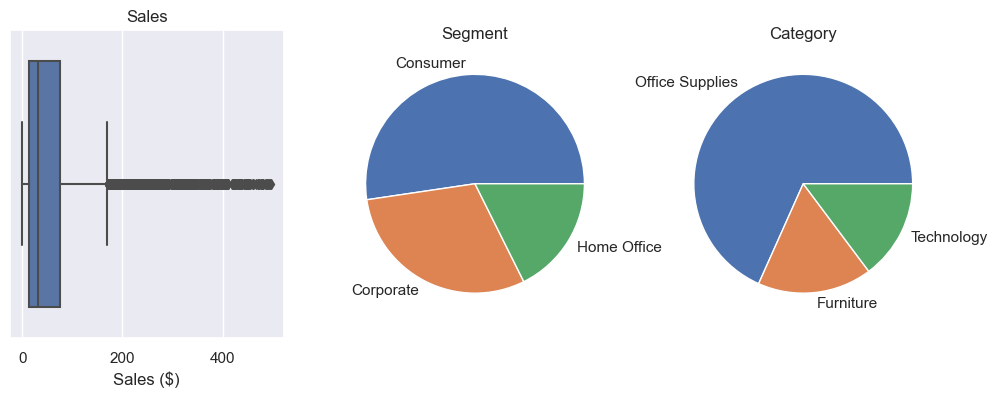

In [28]:
# plot the cleaned data
fig, axs = plt.subplots(1,3, figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x=df_cut['Sales'])
plt.xlabel('Sales ($)')
plt.title('Sales')
plt.subplot(1,3,2)
df_cut['Segment'].value_counts(normalize=True).plot(kind="pie")
plt.title('Segment')
plt.ylabel("")
plt.subplot(1,3,3)
df_cut['Category'].value_counts(normalize=True).plot(kind="pie")
plt.title('Category')
plt.ylabel("")
plt.show();

In [29]:
# remove outliers in 'Profit'
q1 = df_cut['Sales'].quantile(0.25)
q3 = df_cut['Sales'].quantile(0.75)
IQR = q3- q1
Max = q3 + 1.5*IQR
print("the first quantile of sales in clean data: ${}; the third quantile of sales: ${}; IQR: {}; MAX {}".format(q1,q3, IQR, Max))

the first quantile of sales in clean data: $12.96; the third quantile of sales: $75.85; IQR: 62.88999999999999; MAX 170.185


In [30]:
df_cut.head()

,Ship Mode,Segment,State,Region,Category,Sales,Quantity,Discount,Profit,Waiting_Days,Order_Year
8532,Standard Class,Consumer,Michigan,Central,Office Supplies,496.860,7,0.0,24.8430,6,2016
3287,First Class,Consumer,California,West,Technology,494.376,3,0.2,49.4376,2,2015
2447,Standard Class,Consumer,Pennsylvania,East,Furniture,492.835,5,0.3,-14.0810,6,2016
2579,Standard Class,Home Office,Virginia,South,Office Supplies,489.920,8,0.0,0.0000,5,2014
8893,Standard Class,Consumer,Texas,Central,Furniture,489.230,2,0.3,41.9340,7,2014


In [31]:
# find the number of orders in category
(df_cut['Category'] + ',' + df['State']).value_counts().head()

Office Supplies,California      1027
Office Supplies,New York         585
Office Supplies,Texas            503
Furniture,California             298
Office Supplies,Pennsylvania     295
dtype: int64

In [32]:
# find the number of orders in ship mode
(df_cut['Ship Mode'] + ',' + df['State']).value_counts().head()

Standard Class,California      897
Standard Class,New York        504
Standard Class,Texas           452
Second Class,California        312
Standard Class,Pennsylvania    279
dtype: int64

### 5.2 Numeric features summary

In [33]:
# statistic summary
df_cut.describe()

,Sales,Quantity,Discount,Profit,Waiting_Days,Order_Year
count,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.00000
mean,62.314599,3.464962,0.148635,9.636050,3.976055,2015.72822
std,82.271335,2.041211,0.199668,13.843595,1.746975,1.12324
min,0.444000,1.000000,0.000000,-27.735000,0.000000,2014.00000
25%,12.960000,2.000000,0.000000,2.133200,3.000000,2015.00000
50%,30.560000,3.000000,0.200000,6.797800,4.000000,2016.00000
75%,75.850000,5.000000,0.200000,16.016250,5.000000,2017.00000
max,496.860000,14.000000,0.800000,50.584800,7.000000,2017.00000


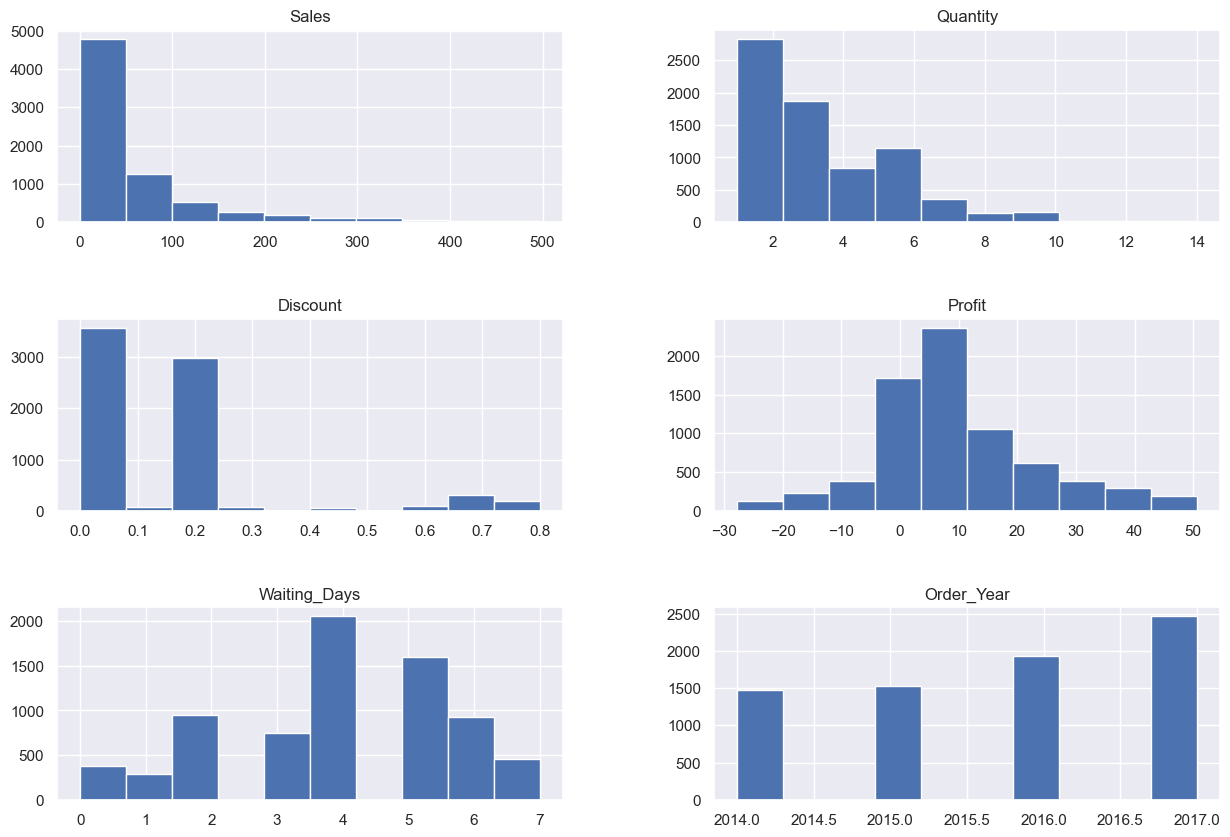

In [34]:
# plot histograms of each of the numeric features
df_cut.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
plt.show();

 - 'Sales' has a right tailed distribution with a range from 0.44 to 496.86.
 - The most often waiting days is 4 days between order and shipping date.
 - Sales increased from year 2014 to 2017.

In [35]:
df_cut[df_cut['Sales'] >490]

,Ship Mode,Segment,State,Region,Category,Sales,Quantity,Discount,Profit,Waiting_Days,Order_Year
8532,Standard Class,Consumer,Michigan,Central,Office Supplies,496.860,7,0.0,24.8430,6,2016
3287,First Class,Consumer,California,West,Technology,494.376,3,0.2,49.4376,2,2015
2447,Standard Class,Consumer,Pennsylvania,East,Furniture,492.835,5,0.3,-14.0810,6,2016


In [36]:
df_cut[df_cut['Waiting_Days'] == 7].value_counts()

Ship Mode       Segment      State       Region  Category         Sales    Quantity  Discount  Profit   Waiting_Days  Order_Year
Standard Class  Consumer     Alabama     South   Technology       44.950   1         0.0       12.5860  7             2014          1
                Corporate    New York    East    Office Supplies  19.440   3         0.0       9.3312   7             2017          1
                                                 Furniture        82.260   3         0.0       33.7266  7             2016          1
                                                                  10.020   3         0.0       4.4088   7             2015          1
                                                                  9.820    2         0.0       3.2406   7             2017          1
                                                                                                                                   ..
                Consumer     New York    East    Office Supplies  2

#### Summary of Sales, Profit, Waiting_Days per state

In [37]:
# average sales per state
State_sales_mean = df_cut.groupby('State')['Sales', 'Profit'].mean()
State_sales_mean.sort_values('Sales', ascending=False, inplace=True)

State_sales_mean.head()

,Sales,Profit
State,,
Idaho,116.145647,14.620565
South Carolina,84.678750,16.437694
Oregon,76.357070,7.575691
California,74.152678,12.952794
Wisconsin,73.609718,16.545917


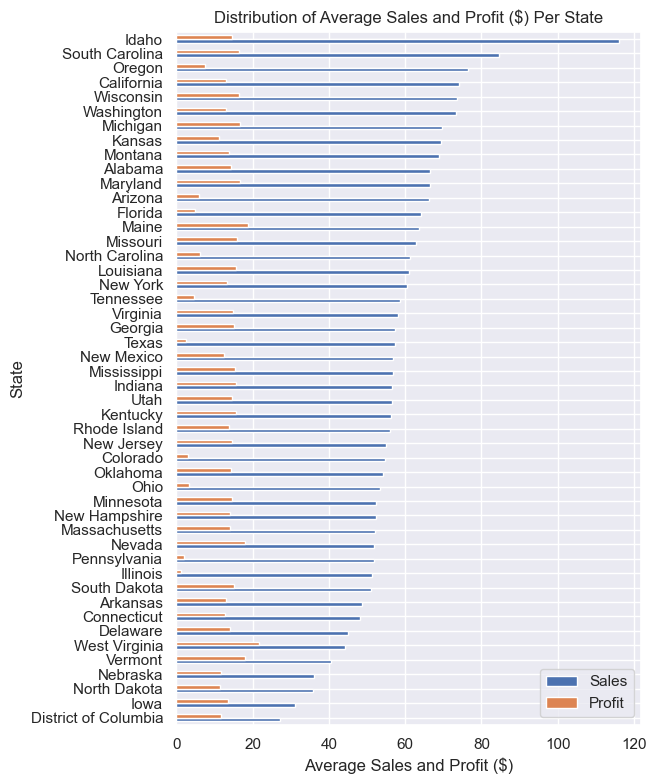

In [38]:
# plot barplot
State_sales_mean.reindex(index=State_sales_mean.Sales.sort_values(ascending=True).index).plot(kind='barh', figsize=(6,9))
plt.xlabel('Average Sales and Profit ($)')
plt.title('Distribution of Average Sales and Profit ($) Per State')
plt.show();

In [39]:
# distribution of sales per state
sales_bystate = pd.melt(df_cut[['State', 'Sales', 'Profit','Quantity', 'Discount']], 
                        id_vars= 'State', 
                        var_name= 'Sales_profit',
                        value_vars =['Sales', 'Profit'], 
                        value_name= 'Amount')

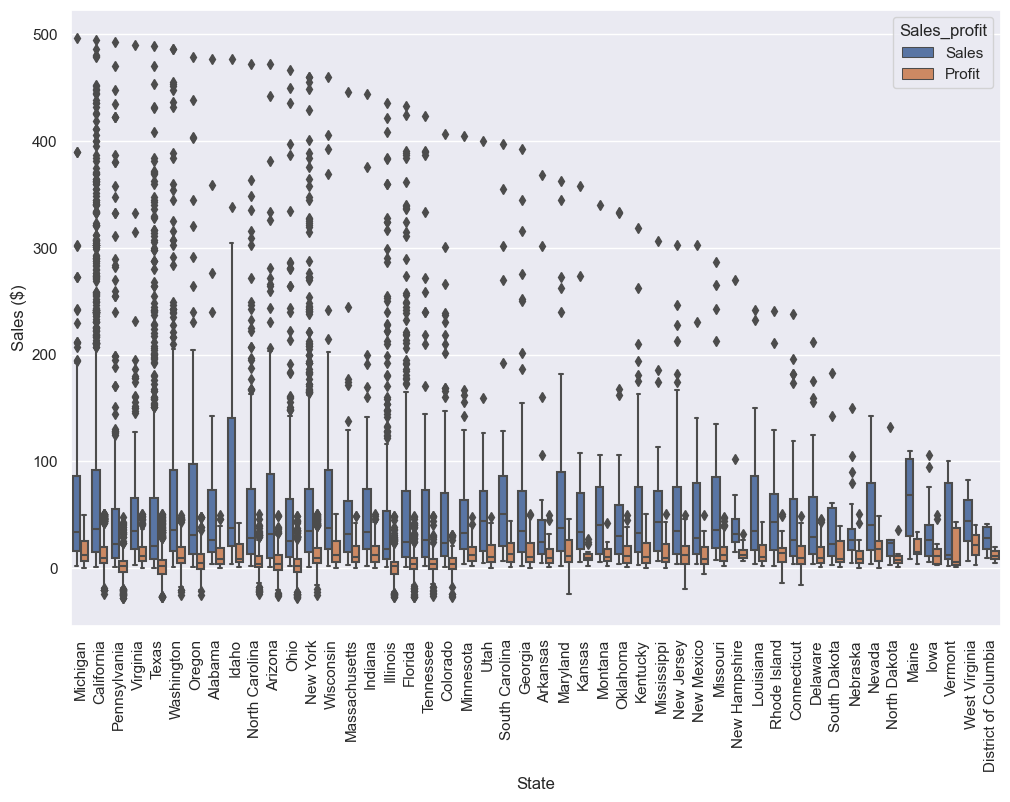

In [40]:
# plot boxplot
plt.subplots(figsize=(12, 8))
sns.boxplot(x='State', y='Amount',hue='Sales_profit', data=sales_bystate)
plt.xticks(rotation='vertical')
plt.ylabel('Sales ($)')
plt.xlabel('State')
plt.show();

 - Looking at the distribution of sales across the states, we can see:
     - Idaho had the most average sales but had very few number of orders.
     - Customers in District of Columbia experienced the longest waiting time between order and shipping date.
     
- Question of interest:
     - What products had the customers in Idaho ordered most?
     - When had the worst delay happened in District of Columbia and what was the cause?
     

- Aside from some relatively high sales in Idaho, New Hampshire, and South Carolina. What shall we do with the state information?

In [41]:
discount_bystate = pd.melt(df_cut[['State', 'Sales', 'Profit','Quantity', 'Discount']], 
                        id_vars= 'State', 
                        var_name= 'Sales_discount',
                        value_vars =['Quantity', 'Discount'], 
                        value_name= 'Amount')

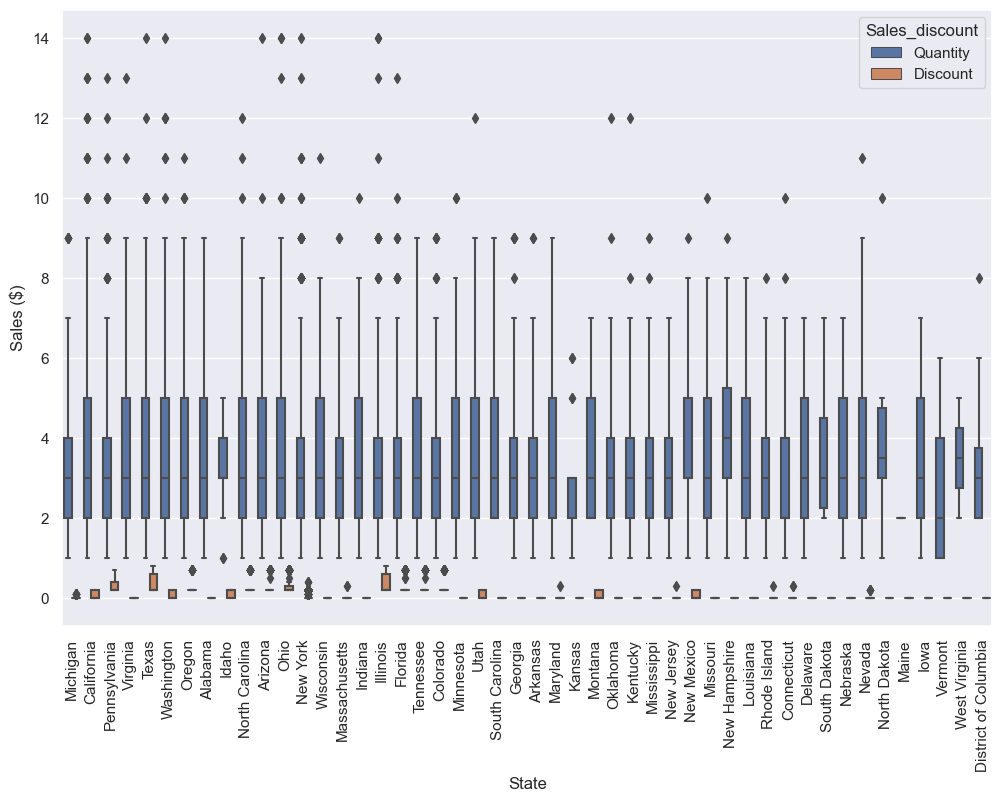

In [42]:
# plot boxplot
plt.subplots(figsize=(12, 8))
sns.boxplot(x='State', y='Amount',hue='Sales_discount', data=discount_bystate)
plt.xticks(rotation='vertical')
plt.ylabel('Sales ($)')
plt.xlabel('State')
plt.show();

In [43]:
state_sales_summary = df_cut.groupby('State').agg(orders_per_state = pd.NamedAgg(column='Sales', aggfunc='size'),
                           total_sales_state = pd.NamedAgg(column='Sales', aggfunc='sum'),
                           total_items_state = pd.NamedAgg(column='Quantity', aggfunc='sum'),                       
                           total_profit_state = pd.NamedAgg(column='Profit', aggfunc='sum'),
                            avg_quantity_state = pd.NamedAgg(column='Quantity', aggfunc=np.mean),
                            avg_discount_state = pd.NamedAgg(column='Discount', aggfunc=np.mean),                      
                            avg_wating_days_state = pd.NamedAgg(column='Waiting_Days', aggfunc=np.mean)).reset_index()

state_sales_summary.head()

,State,orders_per_state,total_sales_state,total_items_state,total_profit_state,avg_quantity_state,avg_discount_state,avg_wating_days_state
0,Alabama,42,2797.6800,156,599.8149,3.714286,0.000000,4.261905
1,Arizona,168,11114.2780,586,986.9604,3.488095,0.282143,4.130952
2,Arkansas,38,1850.5000,141,491.2357,3.710526,0.000000,4.184211
3,California,1543,114417.5815,5379,19986.1619,3.486066,0.065100,3.878159
4,Colorado,132,7212.3490,465,408.1636,3.522727,0.294697,3.704545


#### Population data

In [44]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [45]:
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [46]:
usa_states = usa_states[0]
usa_states.head()

Name &postal abbs. [1]                                Cities               \
  Name &postal abbs. [1] Name &postal abbs. [1].1      Capital   Largest[5]   
0                Alabama                       AL   Montgomery   Birmingham   
1                 Alaska                       AK       Juneau    Anchorage   
2                Arizona                       AZ      Phoenix      Phoenix   
3               Arkansas                       AR  Little Rock  Little Rock   
4             California                       CA   Sacramento  Los Angeles   

  Established[A] Population[B][3] Total area[4]          Land area[4]  \
  Established[A] Population[B][3]           mi2      km2          mi2   
0   Dec 14, 1819          4903185         52420   135767        50645   
1    Jan 3, 1959           731545        665384  1723337       570641   
2   Feb 14, 1912          7278717        113990   295234       113594   
3   Jun 15, 1836          3017804         53179   137732        52035   
4    Sep 9, 1850         39512223        163695   423967       155779   

           Water area[4]         Numberof Reps.  
       km2           mi2     km2 Numberof Reps.  
0   131171          1775    4597              7  
1  1477953         94743  245384              1  
2   294207           396    1026              9  
3   134771          1143    2961              4  
4   403466          7916   20501             53

In [47]:
usa_states_sub = usa_states.iloc[:, [0,5]].copy()
usa_states_sub.columns = ['State', 'state_population']
usa_states_sub.head()

,State,state_population
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


In [48]:
# Find the states in `state_summary` that are not in `usa_states_sub`
#Hint: set(list1) - set(list2) is an easy way to get items in list1 that are not in list2
missing_states = set(state_sales_summary.State) - set(usa_states_sub.State)
missing_states

{'District of Columbia',
 'Kentucky',
 'Massachusetts',
 'Pennsylvania',
 'Rhode Island',
 'Virginia'}

In [49]:
usa_states_sub.State[usa_states_sub.State.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia|Washington|Kentucky')]

16         Kentucky[C]
20    Massachusetts[C]
37     Pennsylvania[C]
38     Rhode Island[D]
45         Virginia[C]
46          Washington
47       West Virginia
Name: State, dtype: object

In [50]:
#Use pandas' Series' `replace()` method to replace anything within square brackets (including the brackets)
#with the empty string. Do this inplace, so you need to specify the arguments:
#to_replace='\[.*\]' #literal square bracket followed by anything or nothing followed by literal closing bracket
#value='' #empty string as replacement
#regex=True #we used a regex in our `to_replace` argument
#inplace=True #Do this "in place"
usa_states_sub.State.replace(to_replace=r'\[.*\]', value='', regex=True, inplace=True)
usa_states_sub.State[usa_states_sub.State.str.contains('Kentucky|Massachusetts|Pennsylvania|Rhode Island|Virginia')]

16         Kentucky
20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: State, dtype: object

In [51]:
state_sales_summary['State'].replace(to_replace ='District of Columbia', value='Maryland', inplace=True)

In [52]:
# verify no state missing in summary
missing_states = set(state_sales_summary.State) - set(usa_states_sub.State)
missing_states

set()

In [53]:
#Use 'state_summary's `merge()` method to combine our new data in 'usa_states_sub'
#specify the arguments how='left' and on='state'
state_summary = state_sales_summary.merge(usa_states_sub, how='left', on='State')
state_summary.head()

,State,orders_per_state,total_sales_state,total_items_state,total_profit_state,avg_quantity_state,avg_discount_state,avg_wating_days_state,state_population
0,Alabama,42,2797.6800,156,599.8149,3.714286,0.000000,4.261905,4903185
1,Arizona,168,11114.2780,586,986.9604,3.488095,0.282143,4.130952,7278717
2,Arkansas,38,1850.5000,141,491.2357,3.710526,0.000000,4.184211,3017804
3,California,1543,114417.5815,5379,19986.1619,3.486066,0.065100,3.878159,39512223
4,Colorado,132,7212.3490,465,408.1636,3.522727,0.294697,3.704545,5758736


 - Create a new data frame of summary statistics for various states by adding information of population per state.

### save the data

In [54]:
df_cut.shape

(7392, 11)

In [55]:
# save the data to a new csv file
datapath = './data'
save_file(df_cut, 'data_cleaned.csv', datapath)

# save the state_summary separately.
datapath = './data'
save_file(state_sales_summary, 'state_sales_summary.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "./data\data_cleaned.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "./data\state_sales_summary.csv"


In [56]:
### Explore Data Analysis (EDA)

In [57]:
state_summary_newind= state_summary.set_index('State')
state_summary_newind.head()

,orders_per_state,total_sales_state,total_items_state,total_profit_state,avg_quantity_state,avg_discount_state,avg_wating_days_state,state_population
State,,,,,,,,
Alabama,42,2797.6800,156,599.8149,3.714286,0.000000,4.261905,4903185
Arizona,168,11114.2780,586,986.9604,3.488095,0.282143,4.130952,7278717
Arkansas,38,1850.5000,141,491.2357,3.710526,0.000000,4.184211,3017804
California,1543,114417.5815,5379,19986.1619,3.486066,0.065100,3.878159,39512223
Colorado,132,7212.3490,465,408.1636,3.522727,0.294697,3.704545,5758736


In [58]:
state_summary_newind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, Alabama to Wisconsin
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   orders_per_state       48 non-null     int64  
 1   total_sales_state      48 non-null     float64
 2   total_items_state      48 non-null     int64  
 3   total_profit_state     48 non-null     float64
 4   avg_quantity_state     48 non-null     float64
 5   avg_discount_state     48 non-null     float64
 6   avg_wating_days_state  48 non-null     float64
 7   state_population       48 non-null     int64  
dtypes: float64(5), int64(3)
memory usage: 3.4+ KB


#### Total state population

In [59]:
state_summary_newind.state_population.sort_values(ascending=False).head()

State
California      39512223
Texas           28995881
Florida         21477737
New York        19453561
Pennsylvania    12801989
Name: state_population, dtype: int64

 - California is the most densely populated state; Texas is in the second. 

#### Total sales per state

In [60]:
state_summary_newind.total_sales_state.sort_values(ascending=False).head()

State
California      114417.5815
New York         50030.4240
Texas            42113.6214
Washington       28275.9260
Pennsylvania     22561.8610
Name: total_sales_state, dtype: float64

#### Total sold items per state

In [61]:
state_summary_newind.total_items_state.sort_values(ascending=False).head()

State
California      5379
New York        2819
Texas           2569
Pennsylvania    1468
Washington      1323
Name: total_items_state, dtype: int64

#### Total profit per state

In [62]:
state_summary_newind.total_profit_state.sort_values(ascending=False).head()

State
California    19986.1619
New York      10892.5493
Washington     4988.2620
Michigan       2863.2249
Virginia       2214.9051
Name: total_profit_state, dtype: float64

#### average waiting days per state

In [63]:
state_summary_newind.avg_wating_days_state.sort_values(ascending=False).head()

State
Maryland      5.625000
Maine         5.400000
Minnesota     4.676923
Oklahoma      4.625000
New Mexico    4.586207
Name: avg_wating_days_state, dtype: float64

#### Order density

In [64]:
#
state_summary['profit_per_100kcapita'] = 100_000 * state_summary.total_profit_state / state_summary.state_population
state_summary['items_per_100kcapita'] = round(100_000 * state_summary.total_items_state / state_summary.state_population)
state_summary['orders_per_100kcapita'] = round(100_000 * state_summary.orders_per_state / state_summary.state_population)

state_summary.head()

,State,orders_per_state,total_sales_state,total_items_state,total_profit_state,avg_quantity_state,avg_discount_state,avg_wating_days_state,state_population,profit_per_100kcapita,items_per_100kcapita,orders_per_100kcapita
0,Alabama,42,2797.6800,156,599.8149,3.714286,0.000000,4.261905,4903185,12.233169,3.0,1.0
1,Arizona,168,11114.2780,586,986.9604,3.488095,0.282143,4.130952,7278717,13.559538,8.0,2.0
2,Arkansas,38,1850.5000,141,491.2357,3.710526,0.000000,4.184211,3017804,16.277919,5.0,1.0
3,California,1543,114417.5815,5379,19986.1619,3.486066,0.065100,3.878159,39512223,50.582226,14.0,4.0
4,Colorado,132,7212.3490,465,408.1636,3.522727,0.294697,3.704545,5758736,7.087729,8.0,2.0


In [65]:
state_summary.columns

Index(['State', 'orders_per_state', 'total_sales_state', 'total_items_state',
       'total_profit_state', 'avg_quantity_state', 'avg_discount_state',
       'avg_wating_days_state', 'state_population', 'profit_per_100kcapita',
       'items_per_100kcapita', 'orders_per_100kcapita'],
      dtype='object')

In [66]:
state_summary_per_100k = state_summary.drop(columns=['orders_per_state', 'total_items_state',
       'total_profit_state', 'state_population'])

In [67]:
state_summary_per_100k.head()

,State,total_sales_state,avg_quantity_state,avg_discount_state,avg_wating_days_state,profit_per_100kcapita,items_per_100kcapita,orders_per_100kcapita
0,Alabama,2797.6800,3.714286,0.000000,4.261905,12.233169,3.0,1.0
1,Arizona,11114.2780,3.488095,0.282143,4.130952,13.559538,8.0,2.0
2,Arkansas,1850.5000,3.710526,0.000000,4.184211,16.277919,5.0,1.0
3,California,114417.5815,3.486066,0.065100,3.878159,50.582226,14.0,4.0
4,Colorado,7212.3490,3.522727,0.294697,3.704545,7.087729,8.0,2.0


In [68]:
# target feature
# for Texas only
state_summary_per_100k[state_summary_per_100k['State'] == 'Texas']

,State,total_sales_state,avg_quantity_state,avg_discount_state,avg_wating_days_state,profit_per_100kcapita,items_per_100kcapita,orders_per_100kcapita
41,Texas,42113.6214,3.495238,0.349197,3.945578,6.274587,9.0,3.0


### 5.3 Categorical features

In [69]:
# Categorical to Quantitative relationship
categorical_features = [i for i in df_cut.columns if df_cut.dtypes[i] == "object"]
categorical_features.remove("State")
categorical_features

['Ship Mode', 'Segment', 'Region', 'Category']

In [70]:
df_cat = df_cut[categorical_features]

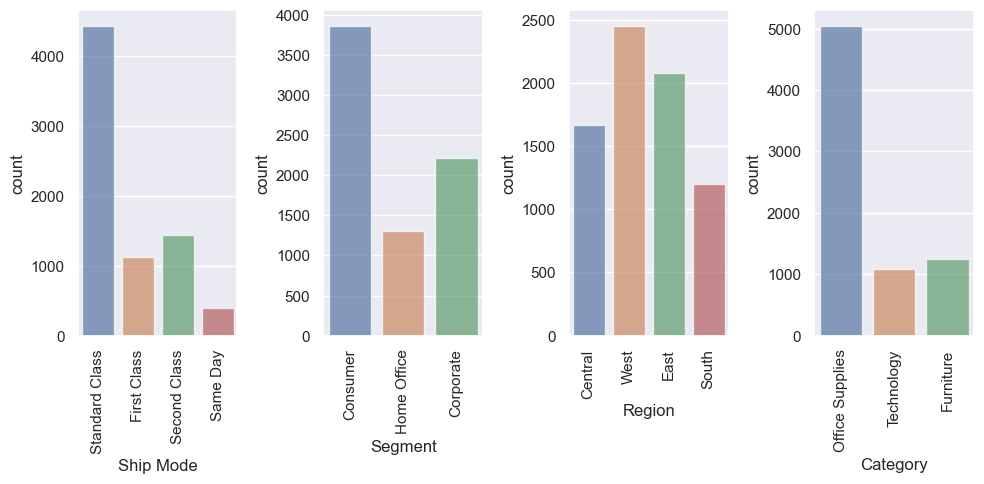

In [71]:
# Countplot for each of the categorical features in the train set
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

# plot barplot of each feature
for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)
fig.tight_layout()        
plt.show();

 - Ship mode: standard class is the most often used shipping method
 - Segment: Consumer sales is dominant
 - Region: West and East regions have higher amount of sales than Central and South
 - Category: Office supplies are the most often ordered items

In [72]:
df_cat.head()

,Ship Mode,Segment,Region,Category
8532,Standard Class,Consumer,Central,Office Supplies
3287,First Class,Consumer,West,Technology
2447,Standard Class,Consumer,East,Furniture
2579,Standard Class,Home Office,South,Office Supplies
8893,Standard Class,Consumer,Central,Furniture


In [73]:
df_cat_sales = df_cut[['Ship Mode', 'Segment', 'Region', 'Category', 'Sales']]

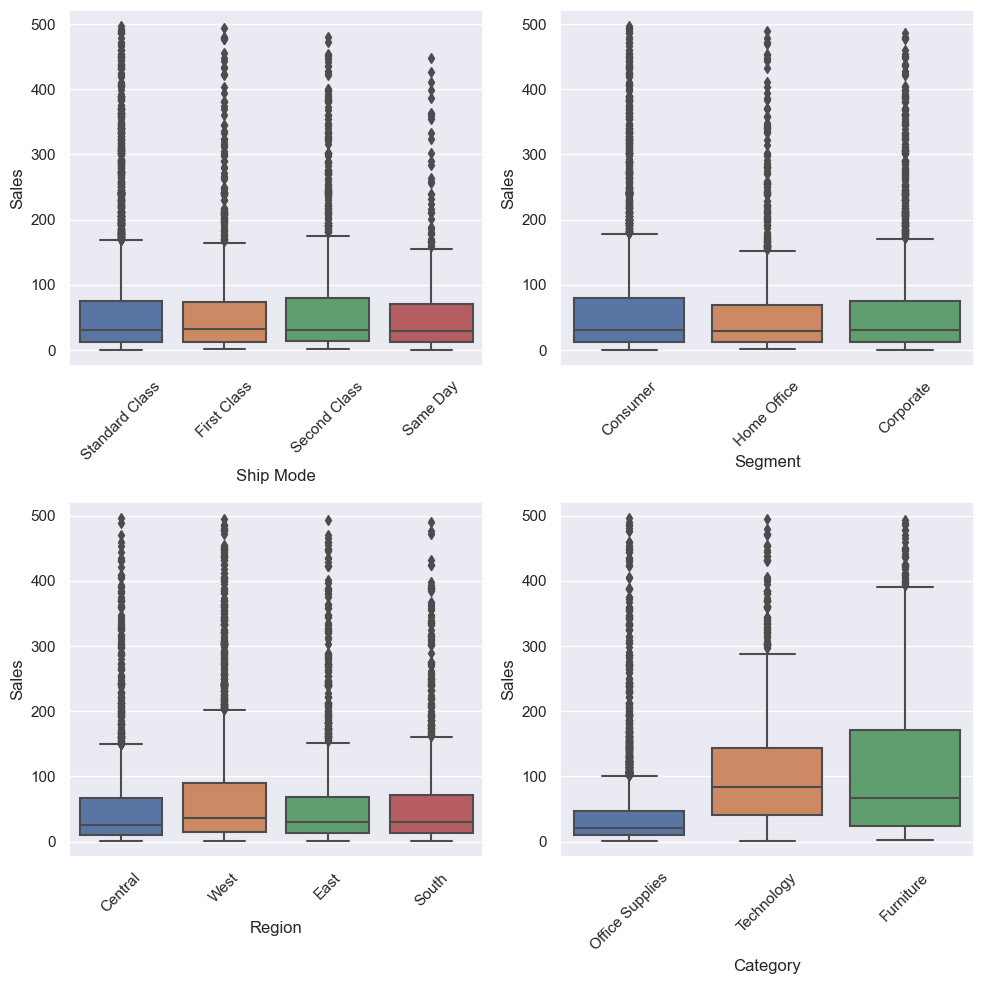

In [74]:
# With the boxplot we can see the variation of the target 'SalePrice' in each of the categorical features
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# plot the variation of Sales in each feature
for i, ax in enumerate(fig.axes):

    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(x=df_cat.columns[i], y="Sales", data=df_cat_sales, ax=ax)

fig.tight_layout()
plt.show();

This exploratory data analysis is to visualize the impact of each feature on sales. 
 - Furniture is associated with the highest amount of sales. 

#### Ship mode

In [75]:
pivot_shipmode = pd.pivot_table(data=df_cut, index=['State'], columns='Ship Mode', values ='Sales', fill_value=0)
pivot_shipmode.head()

Ship Mode,First Class,Same Day,Second Class,Standard Class
State,,,,
Alabama,103.618571,29.000000,53.634000,62.792083
Arizona,72.828367,74.409167,86.438000,58.989240
Arkansas,38.641429,9.540000,86.420000,43.831250
California,70.097821,68.136714,73.260912,76.171645
Colorado,69.991484,66.585000,41.139130,51.757743


In [76]:
# fill in NaN values
#cols = ['First Class', 'Same Day', 'Second Class', 'Standard Class']
# for col in cols:
#   pivot_segment.loc[pivot_segment[col].isnull(), col] = 0

In [77]:
df_shipmode = pivot_shipmode.reset_index()[['State', 'Same Day','First Class', 'Second Class', 'Standard Class']]
df_shipmode.head()

Ship Mode,State,Same Day,First Class,Second Class,Standard Class
0,Alabama,29.000000,103.618571,53.634000,62.792083
1,Arizona,74.409167,72.828367,86.438000,58.989240
2,Arkansas,9.540000,38.641429,86.420000,43.831250
3,California,68.136714,70.097821,73.260912,76.171645
4,Colorado,66.585000,69.991484,41.139130,51.757743


#### Segment

In [78]:
pivot_segment = pd.pivot_table(data=df_cut, index=['State'], columns='Segment', values ='Sales', fill_value=0)
pivot_segment.head()

Segment,Consumer,Corporate,Home Office
State,,,
Alabama,48.348125,86.815263,53.517143
Arizona,53.532723,78.531542,78.420216
Arkansas,44.530455,70.821250,38.032500
California,76.430461,78.928783,57.700092
Colorado,57.493841,55.816650,44.026435


In [79]:
df_seg = pivot_segment.reset_index()[['State', 'Consumer', 'Corporate', 'Home Office']]
df_seg.head()

Segment,State,Consumer,Corporate,Home Office
0,Alabama,48.348125,86.815263,53.517143
1,Arizona,53.532723,78.531542,78.420216
2,Arkansas,44.530455,70.821250,38.032500
3,California,76.430461,78.928783,57.700092
4,Colorado,57.493841,55.816650,44.026435


#### Category

In [80]:
pivot_category = pd.pivot_table(data=df_cut, index=['State'], columns='Category', values ='Sales', fill_value=0)
pivot_category.head()

Category,Furniture,Office Supplies,Technology
State,,,
Alabama,108.204000,54.346000,89.468571
Arizona,114.298852,35.921654,123.076235
Arkansas,106.320000,39.758519,40.903333
California,135.798065,43.038070,136.466330
Colorado,63.308800,30.584549,124.867840


In [81]:
df_category = pivot_category.reset_index()[['State', 'Furniture', 'Office Supplies', 'Technology']]
df_category.head()

Category,State,Furniture,Office Supplies,Technology
0,Alabama,108.204000,54.346000,89.468571
1,Arizona,114.298852,35.921654,123.076235
2,Arkansas,106.320000,39.758519,40.903333
3,California,135.798065,43.038070,136.466330
4,Colorado,63.308800,30.584549,124.867840


In [82]:
state_summary = state_sales_summary.merge(usa_states_sub, how='left', on='State')
state_summary.head()

,State,orders_per_state,total_sales_state,total_items_state,total_profit_state,avg_quantity_state,avg_discount_state,avg_wating_days_state,state_population
0,Alabama,42,2797.6800,156,599.8149,3.714286,0.000000,4.261905,4903185
1,Arizona,168,11114.2780,586,986.9604,3.488095,0.282143,4.130952,7278717
2,Arkansas,38,1850.5000,141,491.2357,3.710526,0.000000,4.184211,3017804
3,California,1543,114417.5815,5379,19986.1619,3.486066,0.065100,3.878159,39512223
4,Colorado,132,7212.3490,465,408.1636,3.522727,0.294697,3.704545,5758736


In [83]:
cat = df_shipmode.merge(df_seg, how='left', on='State')

In [84]:
cat_merge = cat.merge(df_category, how='left', on='State')
cat_merge.head()

,State,Same Day,First Class,Second Class,Standard Class,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology
0,Alabama,29.000000,103.618571,53.634000,62.792083,48.348125,86.815263,53.517143,108.204000,54.346000,89.468571
1,Arizona,74.409167,72.828367,86.438000,58.989240,53.532723,78.531542,78.420216,114.298852,35.921654,123.076235
2,Arkansas,9.540000,38.641429,86.420000,43.831250,44.530455,70.821250,38.032500,106.320000,39.758519,40.903333
3,California,68.136714,70.097821,73.260912,76.171645,76.430461,78.928783,57.700092,135.798065,43.038070,136.466330
4,Colorado,66.585000,69.991484,41.139130,51.757743,57.493841,55.816650,44.026435,63.308800,30.584549,124.867840


In [85]:
# merge numeric and categorical features
df_all = state_summary_per_100k.merge(cat_merge, how='left', on='State')

### 5.5 PCA

To Transform the original features into uncorrelated features in new dimensions and view the data from the most informative view point. use derived features to visualize the data in a lower dimension and know how much variance the derived new features can explain. 

The basic steps in this process are:

1. scale the data (important here because our features are heterogeneous)
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to derive the new features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients

- **Scale the data**

In [86]:
df_all_state = df_all.set_index('State')
#Save the state labels 
state_index = df_all_state.index
#Save the column names
all_columns = df_all_state.columns
df_all_state.head()

,total_sales_state,avg_quantity_state,avg_discount_state,avg_wating_days_state,profit_per_100kcapita,items_per_100kcapita,orders_per_100kcapita,Same Day,First Class,Second Class,Standard Class,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology
State,,,,,,,,,,,,,,,,,
Alabama,2797.6800,3.714286,0.000000,4.261905,12.233169,3.0,1.0,29.000000,103.618571,53.634000,62.792083,48.348125,86.815263,53.517143,108.204000,54.346000,89.468571
Arizona,11114.2780,3.488095,0.282143,4.130952,13.559538,8.0,2.0,74.409167,72.828367,86.438000,58.989240,53.532723,78.531542,78.420216,114.298852,35.921654,123.076235
Arkansas,1850.5000,3.710526,0.000000,4.184211,16.277919,5.0,1.0,9.540000,38.641429,86.420000,43.831250,44.530455,70.821250,38.032500,106.320000,39.758519,40.903333
California,114417.5815,3.486066,0.065100,3.878159,50.582226,14.0,4.0,68.136714,70.097821,73.260912,76.171645,76.430461,78.928783,57.700092,135.798065,43.038070,136.466330
Colorado,7212.3490,3.522727,0.294697,3.704545,7.087729,8.0,2.0,66.585000,69.991484,41.139130,51.757743,57.493841,55.816650,44.026435,63.308800,30.584549,124.867840


In [87]:
# scale() returns an ndarray, so you lose the column names
all_scaled = scale(df_all_state)

In [88]:
df_scaled = pd.DataFrame(all_scaled, columns=all_columns)
df_scaled.head()

,total_sales_state,avg_quantity_state,avg_discount_state,avg_wating_days_state,profit_per_100kcapita,items_per_100kcapita,orders_per_100kcapita,Same Day,First Class,Second Class,Standard Class,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology
0,-0.368920,0.636211,-0.622632,0.408482,-0.414333,-0.650532,-0.531498,-0.336154,1.422584,-0.065319,0.393785,-0.405827,1.341893,0.082884,0.343566,1.310442,-0.018854
1,0.082362,0.029073,1.732190,0.152651,-0.335792,0.489086,0.241590,1.010725,0.562217,1.212339,0.126081,-0.176130,0.986503,1.148499,0.481078,-0.535326,0.739070
2,-0.420316,0.626120,-0.622632,0.256697,-0.174822,-0.194685,-0.531498,-0.913357,-0.393064,1.211638,-0.940976,-0.574964,0.655714,-0.579712,0.301060,-0.150946,-1.114102
3,5.687878,0.023626,-0.079290,-0.341209,1.856515,1.856629,1.787766,0.824678,0.485918,0.699115,1.335648,0.838325,1.003545,0.261874,0.966141,0.177603,1.041045
4,-0.129368,0.122032,1.836970,-0.680384,-0.719021,0.489086,0.241590,0.778653,0.482947,-0.551972,-0.382985,-0.000637,0.011984,-0.323229,-0.669355,-1.070002,0.779475


#### Calculate the PCA transformation

Fit the PCA transformation using the scaled data

In [89]:
model = PCA().fit(all_scaled)

Plot the cumulative variance ratio with number of components.

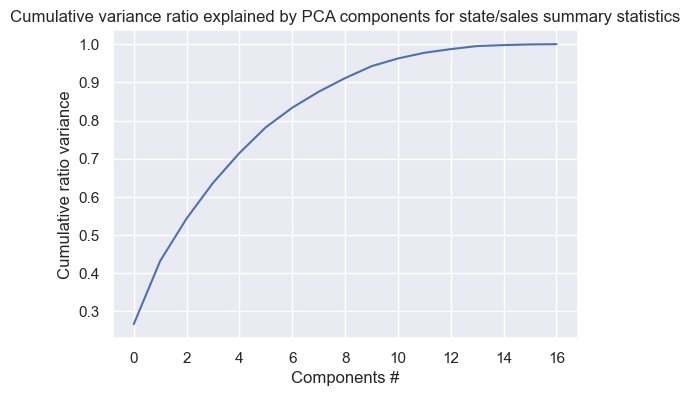

In [90]:
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
plt.subplots(figsize=(6, 4))
plt.plot(model.explained_variance_ratio_.cumsum())
plt.xlabel('Components #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/sales summary statistics')
plt.savefig('images/pca1.png')
plt.show();

#### - **The first 2 components seem to account for over 43% of the variance, and the first 5 for over 80%.**

In [91]:
new_dim_x = model.transform(all_scaled)
new_dim_x.shape

(48, 17)

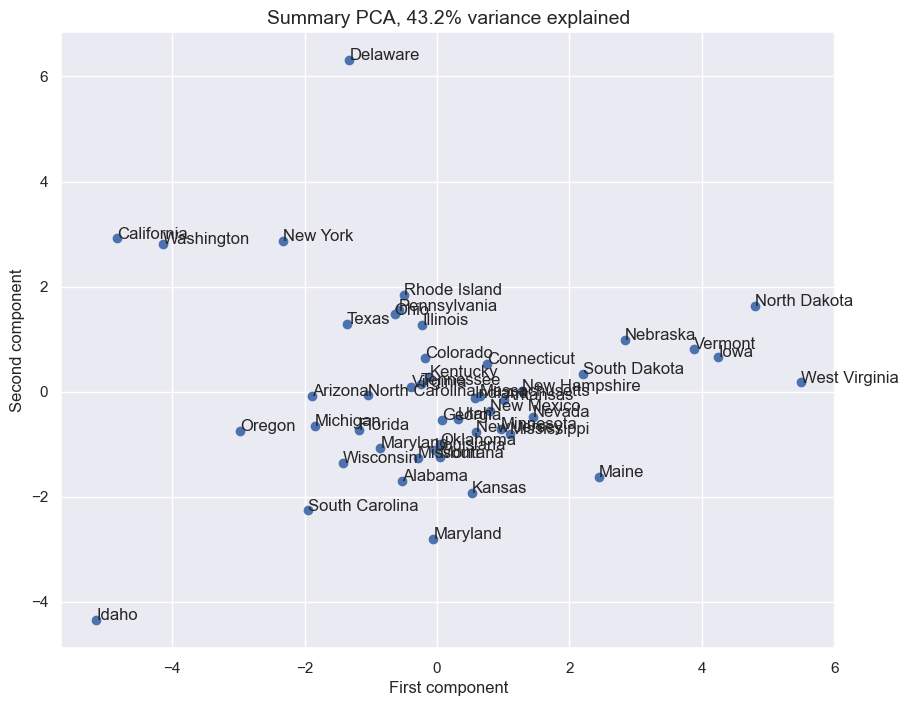

In [92]:
# extract the first and second columns from the transformed data as x and y coordinates for plotting.
# the second (index 1) value of the cumulative variance ratio
# visualizing the percentage variance explained by the two PCA components
x = new_dim_x[:, 0]
y = new_dim_x[:, 1]

pc_var = 100 * model.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Summary PCA, {pc_var:.1f}% variance explained', fontsize=14)
for s, x, y in zip(state_index, x, y):
    plt.annotate(s, (x, y))
    
plt.show();
# Plot the first two derived features (the first two principle components) and label each point with the name of the state.

In [93]:
State_sales_mean.reset_index(inplace=True)
#State_sales_profit_mean.head()
State_sales_mean['State'].replace(to_replace ='District of Columbia', value='Maryland', inplace=True)

state_avg_sales = State_sales_mean[['State', 'Sales']].sort_values('State')
state_avg_sales.set_index('State', inplace=True)
state_avg_sales.head()

,Sales
State,
Alabama,66.611429
Arizona,66.156417
Arkansas,48.697368
California,74.152678
Colorado,54.639008


In [94]:
#Create a dataframe containing the values of the first two PCA components
#Remember the first component was given by state_pca_x[:, 0],
#and the second by state_pca_x[:, 1]
#Call these 'PC1' and 'PC2', new_dimantion_x[:, 0], 'PC2': new_dimantion_x[:, 1]}, index=state_index)
pca_df = pd.DataFrame({'PC1': new_dim_x[:, 0], 'PC2': new_dim_x[:, 1]}, index=state_index)

pca_df.sort_index(inplace=True)
pca_df.head()

,PC1,PC2
State,,
Alabama,-0.526728,-1.698801
Arizona,-1.896020,-0.076248
Arkansas,1.015554,-0.151814
California,-4.831578,2.915378
Colorado,-0.180636,0.637229


In [95]:
#cast it to a dataframe using Series' to_frame() method:
# df_state_avg_sales = state_avg_sales.to_frame()

In [96]:
#Use pd.concat to concatenate `pca_df` and `state_avg_sales` along axis 1
# remember, pd.concat will align on index
pca_df = pd.concat([pca_df, state_avg_sales], axis=1)

In [97]:
# seperate sales into quartiles to show something
pca_df['Quartile'] = pd.qcut(pca_df.Sales, q=4, precision=1)
pca_df.head()

,PC1,PC2,Sales,Quartile
State,,,,
Alabama,-0.526728,-1.698801,66.611429,"(64.6, 116.1]"
Arizona,-1.896020,-0.076248,66.156417,"(64.6, 116.1]"
Arkansas,1.015554,-0.151814,48.697368,"(27.099999999999998, 51.9]"
California,-4.831578,2.915378,74.152678,"(64.6, 116.1]"
Colorado,-0.180636,0.637229,54.639008,"(51.9, 56.7]"


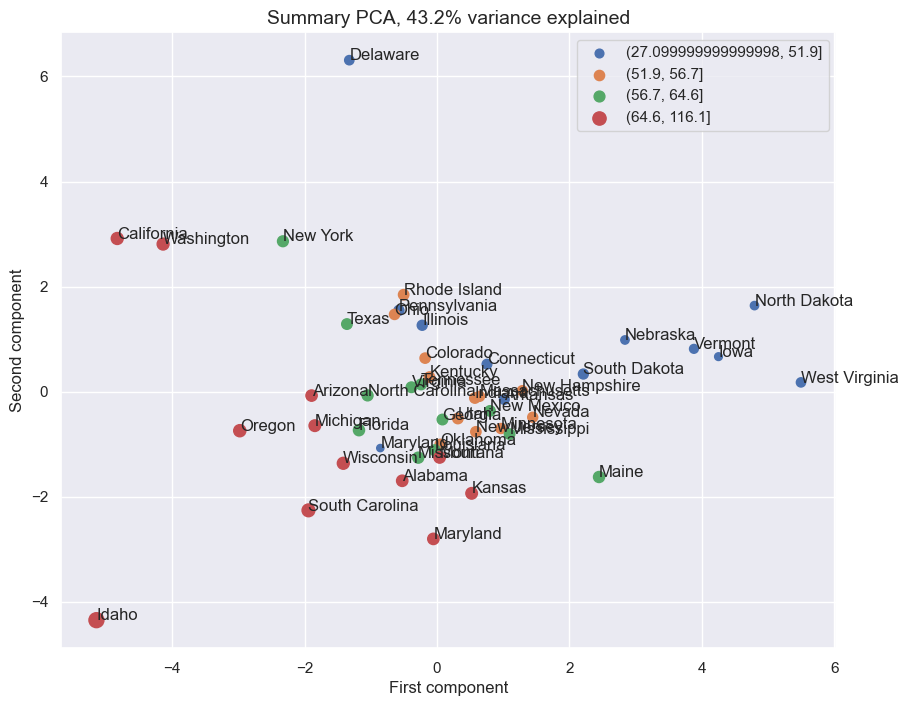

In [98]:
x = pca_df.PC1
y = pca_df.PC2

quartiles = pca_df.Quartile
state = pca_df.index
pc_var = 100 * model.explained_variance_ratio_.cumsum()[1]
s = pca_df['Sales']

fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=s[im], label=q) # s=s[im]*0.1

ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'Summary PCA, {pc_var:.1f}% variance explained',fontsize=14)
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))
    
plt.savefig('images/pca2.png')
plt.show();

**Highlights:**
    - The red points representing the quartile of the largest 'Sales' and it spreads across the first dimension (< 0). There's also a spread of the other quartiles as well.
    - In this representation, the two principal components account for some 43% of the variance in the data.

In [99]:
pd.DataFrame(model.components_, columns=all_columns)

,total_sales_state,avg_quantity_state,avg_discount_state,avg_wating_days_state,profit_per_100kcapita,items_per_100kcapita,orders_per_100kcapita,Same Day,First Class,Second Class,Standard Class,Consumer,Corporate,Home Office,Furniture,Office Supplies,Technology
0,-0.244799,0.002977,-0.157405,0.039067,-0.190344,-0.250808,-0.241383,-0.192304,-0.328246,-0.280448,-0.296511,-0.318988,-0.307516,-0.164008,-0.320030,-0.153802,-0.309473
1,0.256844,0.041884,0.091887,-0.138285,0.406386,0.486128,0.488985,-0.011892,-0.165107,-0.072358,-0.225866,-0.219485,-0.116190,-0.096313,-0.166659,-0.250227,-0.138360
2,0.093566,-0.461949,0.245706,0.198328,-0.085692,0.036044,0.035388,-0.144408,-0.156699,-0.417075,0.375330,-0.175920,-0.029611,0.345405,-0.121611,-0.176614,0.333024
3,-0.094245,-0.424473,-0.533954,0.136688,0.379049,0.011972,0.052038,-0.140787,0.093120,-0.161106,0.097799,-0.148229,0.331331,-0.208631,0.032947,0.316978,-0.140602
4,-0.035356,0.116170,-0.262146,-0.428736,0.149106,-0.017700,0.054003,0.080654,0.017619,-0.123754,0.132975,0.133242,-0.374452,0.410546,-0.377774,0.434610,0.096589
5,-0.162361,0.065072,0.212256,-0.414046,-0.065666,0.043794,0.026766,-0.564115,0.393077,-0.282094,-0.042471,0.146275,0.138348,-0.316123,-0.111013,-0.035354,0.194450
6,-0.099112,0.469338,-0.200062,0.515597,0.243179,0.088828,0.025104,-0.481771,-0.120504,0.045294,0.184049,0.212852,-0.184348,0.060544,0.026230,-0.071303,0.158426
7,-0.032951,0.128535,0.046361,-0.287578,-0.040141,0.019725,-0.030103,-0.425619,-0.103243,0.220014,0.109877,-0.424772,0.208478,0.465769,0.321892,0.055837,-0.307861
8,0.852595,0.065676,-0.054406,-0.021165,-0.156741,-0.137633,-0.131216,-0.208219,-0.094480,-0.113519,0.132477,0.087015,-0.058397,-0.207793,0.012622,0.199514,-0.166700
9,0.064646,-0.156535,-0.409126,-0.424144,0.158465,-0.157331,-0.137054,-0.020507,-0.250371,0.108109,0.091327,0.207700,-0.051128,-0.038808,0.232996,-0.564357,0.228491


 - For the row #1 associated with the 2nd component, both 'items_per_100kcapita' and 'orders_per_100kcapita' have very large positive values which may account for a lot.

In [100]:
df_all[df_all.State.isin(['Texas'])].T

,41
State,Texas
total_sales_state,42113.6214
avg_quantity_state,3.495238
avg_discount_state,0.349197
avg_wating_days_state,3.945578
profit_per_100kcapita,6.274587
items_per_100kcapita,9.0
orders_per_100kcapita,3.0
Same Day,41.629282
First Class,61.468602


In [101]:
df_scaled[df_all.State.isin(['Texas'])].T

,41
total_sales_state,1.764470
avg_quantity_state,0.048245
avg_discount_state,2.291840
avg_wating_days_state,-0.209498
profit_per_100kcapita,-0.767172
items_per_100kcapita,0.717010
orders_per_100kcapita,1.014678
Same Day,0.038442
First Class,0.244793
Second Class,-0.042459


 - 'orders_per_100kcapita', 'Office supplies', and 'Technology' have relatively large absolute values (> 1.) about one standard deviation away from the mean.

#### 5.5 Feature engineering - merge all

- Add the ratios:
    - the ratios of Same Day, First Class, Second Class, Standard Class to the total shipping
    - the ratios of consumer, Corporate, Home Office to the total segment
    - the ratio of Furniture, Office supplies, Technology to the entire category

In [102]:
Total_ship = df_all['Same Day'] + df_all['First Class'] + df_all['Second Class'] + df_all['Standard Class']
Total_segment = df_all['Consumer'] + df_all['Corporate'] + df_all['Home Office']
Total_category = df_all['Furniture'] + df_all['Office Supplies'] + df_all['Technology']

In [103]:
df_all['Total_ship'] = df_all['Same Day'] + df_all['First Class'] + df_all['Second Class'] + df_all['Standard Class']
df_all['Total_segment'] = df_all['Consumer'] + df_all['Corporate'] + df_all['Home Office']
df_all['Total_category'] = df_all['Furniture'] + df_all['Office Supplies'] + df_all['Technology']

df_all['Same_day_ratio'] = df_all['Same Day'] / df_all['Total_ship']
df_all['First Class_ratio'] = df_all['First Class'] / df_all['Total_ship']
df_all['Second Class_ratio'] = df_all['Second Class'] / df_all['Total_ship']
df_all['Standard Class_ratio'] = df_all['Standard Class'] / df_all['Total_ship']

df_all['Consumer_ratio'] = df_all['Consumer'] / df_all['Total_segment']
df_all['Corporate_ratio'] = df_all['Corporate'] / df_all['Total_segment']
df_all['Home_Office_ratio'] = df_all['Home Office'] / df_all['Total_segment']

df_all['Furniture_ratio'] = df_all['Furniture'] / df_all['Total_category']
df_all['Office_Supplies_ratio'] = df_all['Office Supplies'] / df_all['Total_category']
df_all['Technology_ratio'] = df_all['Technology'] / df_all['Total_category']

In [104]:
df_all.columns

Index(['State', 'total_sales_state', 'avg_quantity_state',
       'avg_discount_state', 'avg_wating_days_state', 'profit_per_100kcapita',
       'items_per_100kcapita', 'orders_per_100kcapita', 'Same Day',
       'First Class', 'Second Class', 'Standard Class', 'Consumer',
       'Corporate', 'Home Office', 'Furniture', 'Office Supplies',
       'Technology', 'Total_ship', 'Total_segment', 'Total_category',
       'Same_day_ratio', 'First Class_ratio', 'Second Class_ratio',
       'Standard Class_ratio', 'Consumer_ratio', 'Corporate_ratio',
       'Home_Office_ratio', 'Furniture_ratio', 'Office_Supplies_ratio',
       'Technology_ratio'],
      dtype='object')

In [105]:
To_drop = ['Same Day', 'First Class', 'Second Class',
       'Standard Class', 'Consumer', 'Corporate', 'Home Office', 'Furniture',
       'Office Supplies', 'Technology', 'Total_ship', 'Total_segment',
       'Total_category']

df_all.drop(columns=To_drop, inplace=True)

In [106]:
df_all.head()

,State,total_sales_state,avg_quantity_state,avg_discount_state,avg_wating_days_state,profit_per_100kcapita,items_per_100kcapita,orders_per_100kcapita,Same_day_ratio,First Class_ratio,Second Class_ratio,Standard Class_ratio,Consumer_ratio,Corporate_ratio,Home_Office_ratio,Furniture_ratio,Office_Supplies_ratio,Technology_ratio
0,Alabama,2797.6800,3.714286,0.000000,4.261905,12.233169,3.0,1.0,0.116445,0.416064,0.215359,0.252132,0.256243,0.460118,0.283639,0.429349,0.215643,0.355008
1,Arizona,11114.2780,3.488095,0.282143,4.130952,13.559538,8.0,2.0,0.254247,0.248846,0.295348,0.201559,0.254331,0.373099,0.372570,0.418223,0.131438,0.450339
2,Arkansas,1850.5000,3.710526,0.000000,4.184211,16.277919,5.0,1.0,0.053466,0.216560,0.484328,0.245646,0.290320,0.461725,0.247956,0.568611,0.212633,0.218756
3,California,114417.5815,3.486066,0.065100,3.878159,50.582226,14.0,4.0,0.236860,0.243677,0.254673,0.264791,0.358729,0.370454,0.270817,0.430691,0.136498,0.432811
4,Colorado,7212.3490,3.522727,0.294697,3.704545,7.087729,8.0,2.0,0.290164,0.305009,0.179276,0.225550,0.365419,0.354759,0.279823,0.289397,0.139808,0.570795


### 5.6 Bivariate analysis

The analysis between a dependent variable and an independent variable to uncover the relationship between them.
#### Feature correlation heatmap

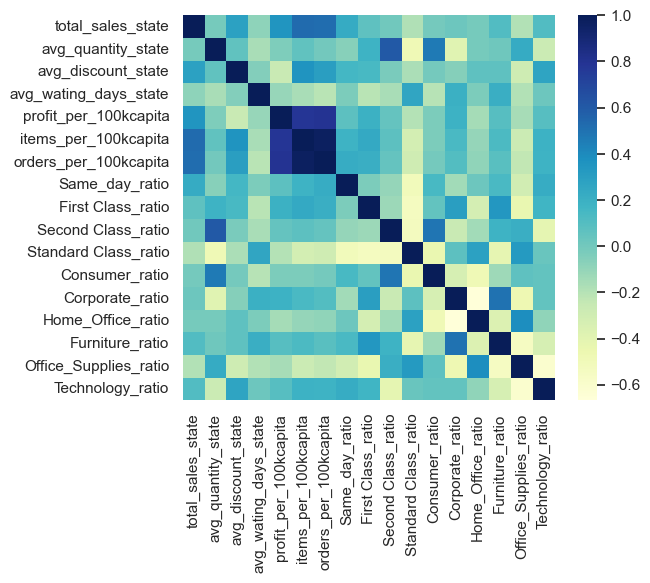

In [107]:
# find relations between two variables
plt.subplots(figsize=(6,5))
sns.heatmap(df_all.corr(), cmap="YlGnBu")
plt.savefig('images/heatmap.png')
plt.show();

 - Higher 'items sold and orders per 100kcapita' tend to generate higher amount of 'Sales'. 
 - Higher number of average quantity per order is more related to 'second class' shipping and 'Consumer'.
 - 'Corporate' is positively associated with the 'First_Class'.  
 - Some multi-conlinearity is introduced with new ratio features and negatively associated with sales, such as if the ratio of the office supplies increases, the sales will decrease. 

#### Scatter plots of numeric features against sales
Like heatmap, a scatter plot is also used to observe linear relations between two variables in a dataset.

In [108]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'total_sales_state', data=df_all,alpha=0.5)
        ax.set(xlabel=col, ylabel='Sales')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [109]:
features = [feature for feature in df_all.columns if feature not in ['State','total_sales_state']]

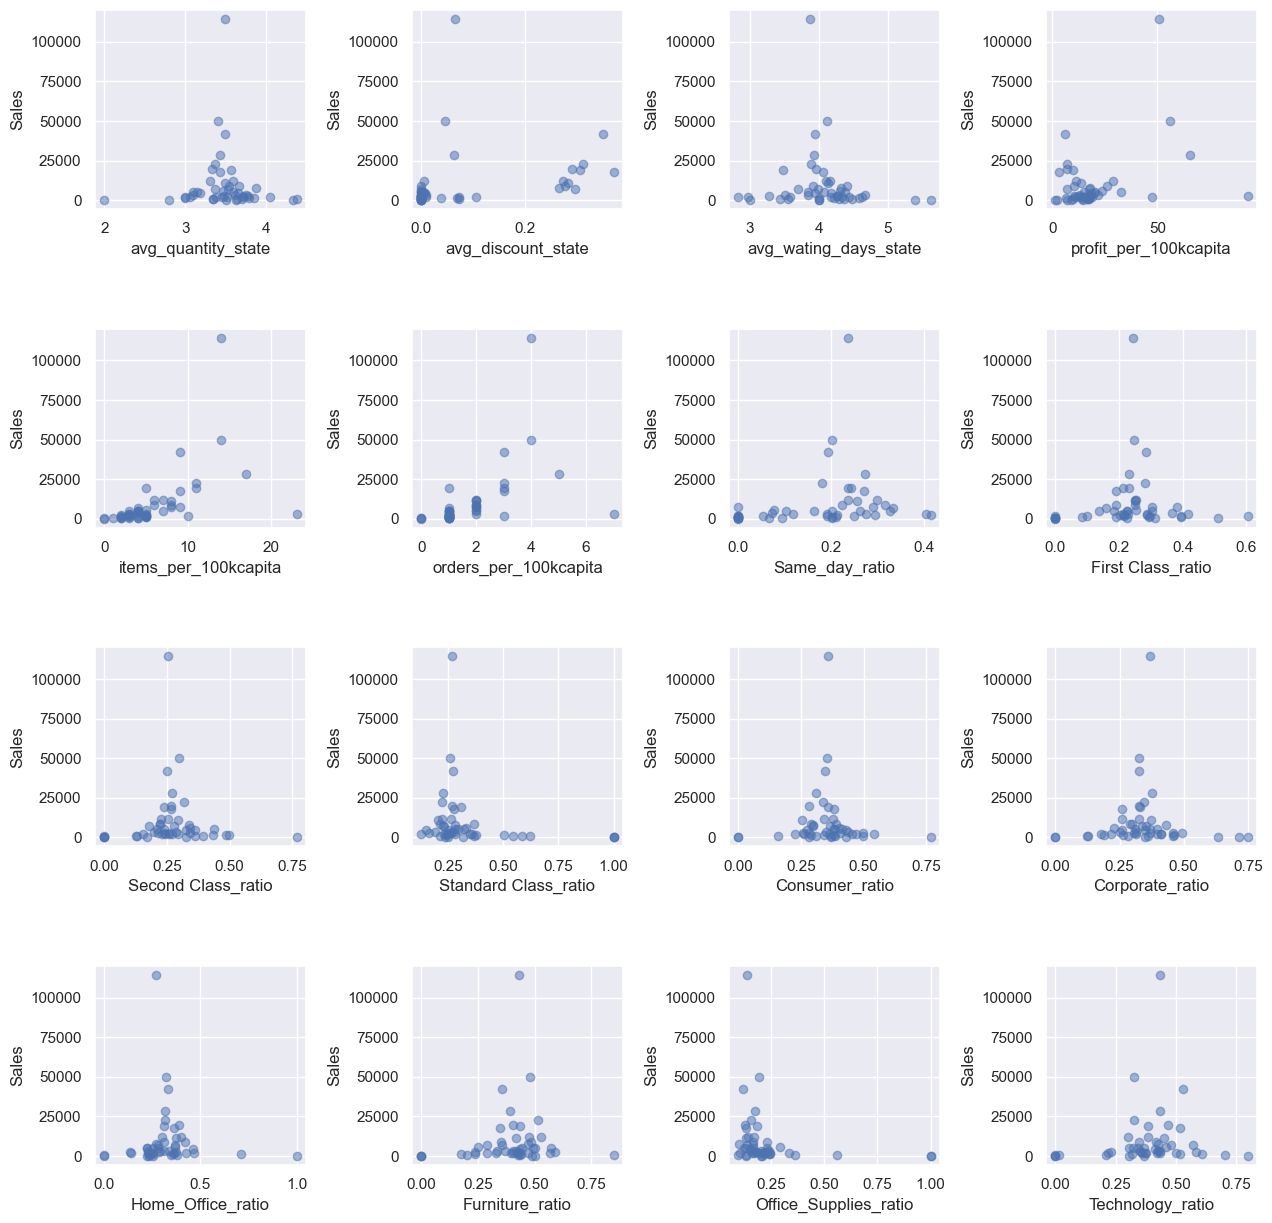

In [110]:
# in this case, the ‘total_sale_state’ attribute is the dependent variable, and every other are the independent variables.
scatterplots(features, ncol=4, figsize=(15, 15))
plt.show();

- There is a strong correlation with 'items_per_100kcapita'. 'orders_per_100kcapita' is also very useful.

In [111]:
# save the state_summary separately.
datapath = './data'
save_file(df_all, 'all_sales_summary.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "./data\all_sales_summary.csv"


### Conclusions

EDA is an important step in the data analysis as it can uncover the important relationships between variables by visualization before statistical analysis. 